# Project Goals 
## Single Variable Association
- Assess the overall distribution of the data

## Double Variable Association
Separation by Country
- Distribution of GDP
- Distribution of Life Expectancy

Accounting for Year
- Distribution and progression of GDP
- Distribution and progression of Life Expectancy

## Triple Variable Association
- Distribution and trend of GDP vs Life Expetancy data, separated visually by country
- Distribution of GDP/Life Expectancy Ratio over time

# Major Questions
- Is there a relationship between GDP and Life Expectancy?
- Does year or country have a greater effect on GDP/Life Expectancy?

# Load the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

%matplotlib notebook

In [2]:
df = pd.read_csv('all_data.csv')

In [3]:
df[df.Country == 'USA'].head()

,Country,Year,Life expectancy at birth (years),GDP


# Explore and Explain Data


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [5]:
df.Year = df.Year.astype('object')

In [6]:
for col in df.columns:
    print(df[col].describe(), '\n')

count        96
unique        6
top       Chile
freq         16
Name: Country, dtype: object 

count       96
unique      16
top       2000
freq         6
Name: Year, dtype: int64 

count    96.000000
mean     72.789583
std      10.672882
min      44.300000
25%      74.475000
50%      76.750000
75%      78.900000
max      81.000000
Name: Life expectancy at birth (years), dtype: float64 

count    9.600000e+01
mean     3.880499e+12
std      5.197561e+12
min      4.415703e+09
25%      1.733018e+11
50%      1.280220e+12
75%      4.067510e+12
max      1.810000e+13
Name: GDP, dtype: float64 



In [7]:
df.loc[df.Country == 'United States of America', 'Country'] = 'USA'
df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe'],
      dtype=object)

### Basic Findings
**Country**
- Unique:
    - Chile
    - China
    - Germany
    - Mexico
    - USA
    - Zimbabwe

**Year**
- Mean:&ensp; 2000
- Max:&emsp;&nbsp;2015

**Life Expectancy**
- Range:&emsp;44.3 - 81.0
- Mean:&emsp; 72.79
- Median:&ensp;76.7

**GDP**
- Range:&emsp;4.4E9 - 1.8E13
- Mean:&emsp;&nbsp;3.88E
- Median:&ensp;1.28E12

## Single Variable Visualisation

In [8]:
def get_basic_dist(fignum, outliers=True):
    data_cols = [df['Life expectancy at birth (years)'], df['GDP']]
    data_quantiles = [np.quantile(x, [0.25, 0.75]) for x in data_cols]
    data_within_quantiles = [data_cols[x][(data_cols[x] >= data_quantiles[x][0]) & (data_cols[x] <= data_quantiles[x][1])] for x in range(2)]
    dfs_to_plot = data_cols if outliers == True else data_within_quantiles
    if outliers == True:
        fig, axes = plt.subplots(2, 2)
        for index, col in enumerate(dfs_to_plot):
            plt.suptitle(f'Fig {fignum} - Basic Data Distribution (w/ Outliers)')
            sns.histplot(ax=axes[index, 0], data=col)
            sns.boxplot(ax=axes[index,1], data=col, color='pink')
    else:
        fig, axes = plt.subplots(1, 2)
        plt.suptitle(f'Fig {fignum} - Basic Data Distribution (w/o Outliers)')
        sns.histplot(ax=axes[0], data=dfs_to_plot[0], bins=10)
        sns.histplot(ax=axes[1], data=dfs_to_plot[1], bins=10, color='pink')
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    plt.show()

<IPython.core.display.Javascript object>


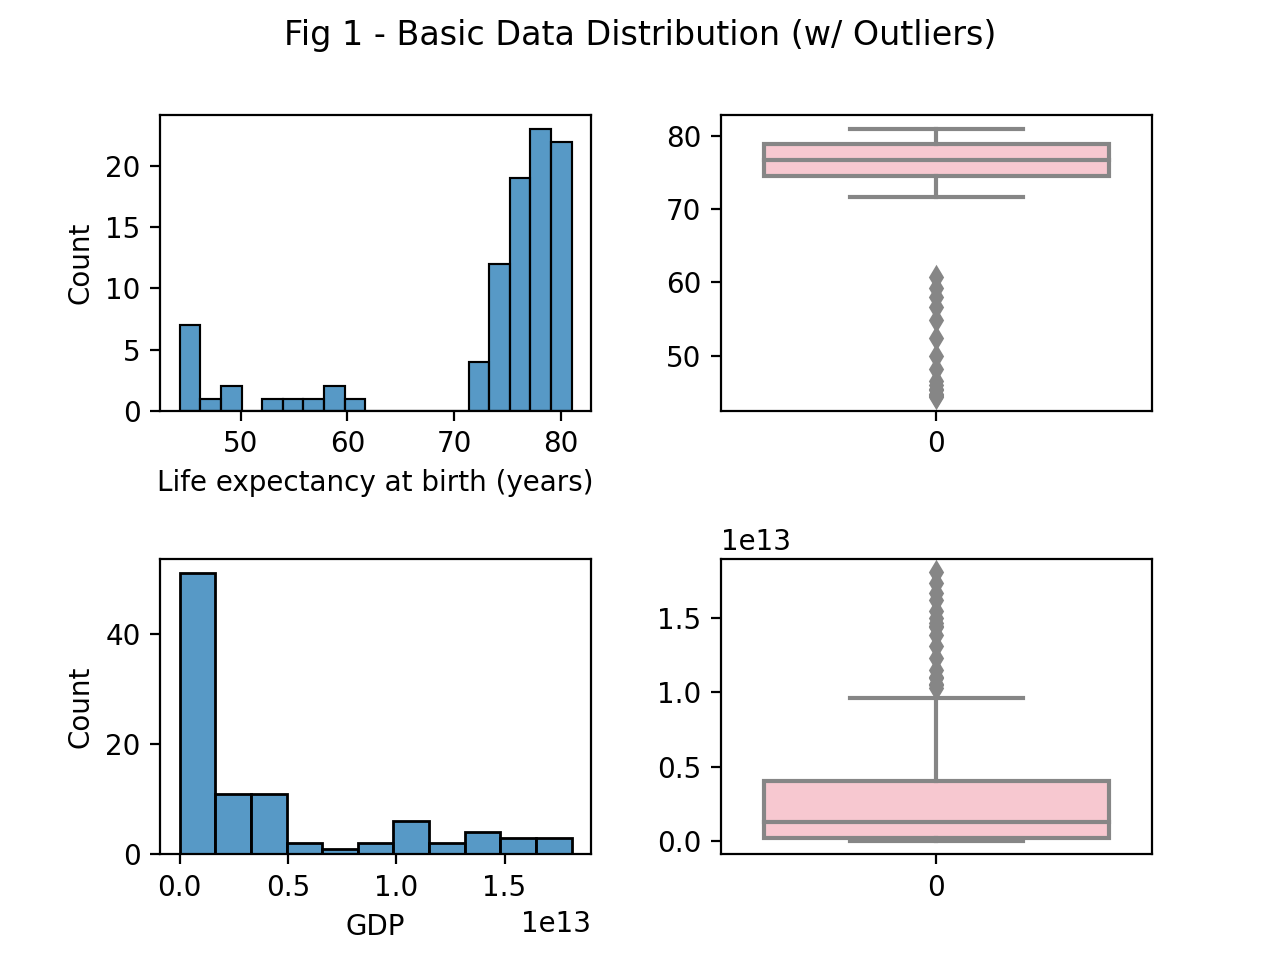

In [9]:
# With Outliers
get_basic_dist(1)

<IPython.core.display.Javascript object>


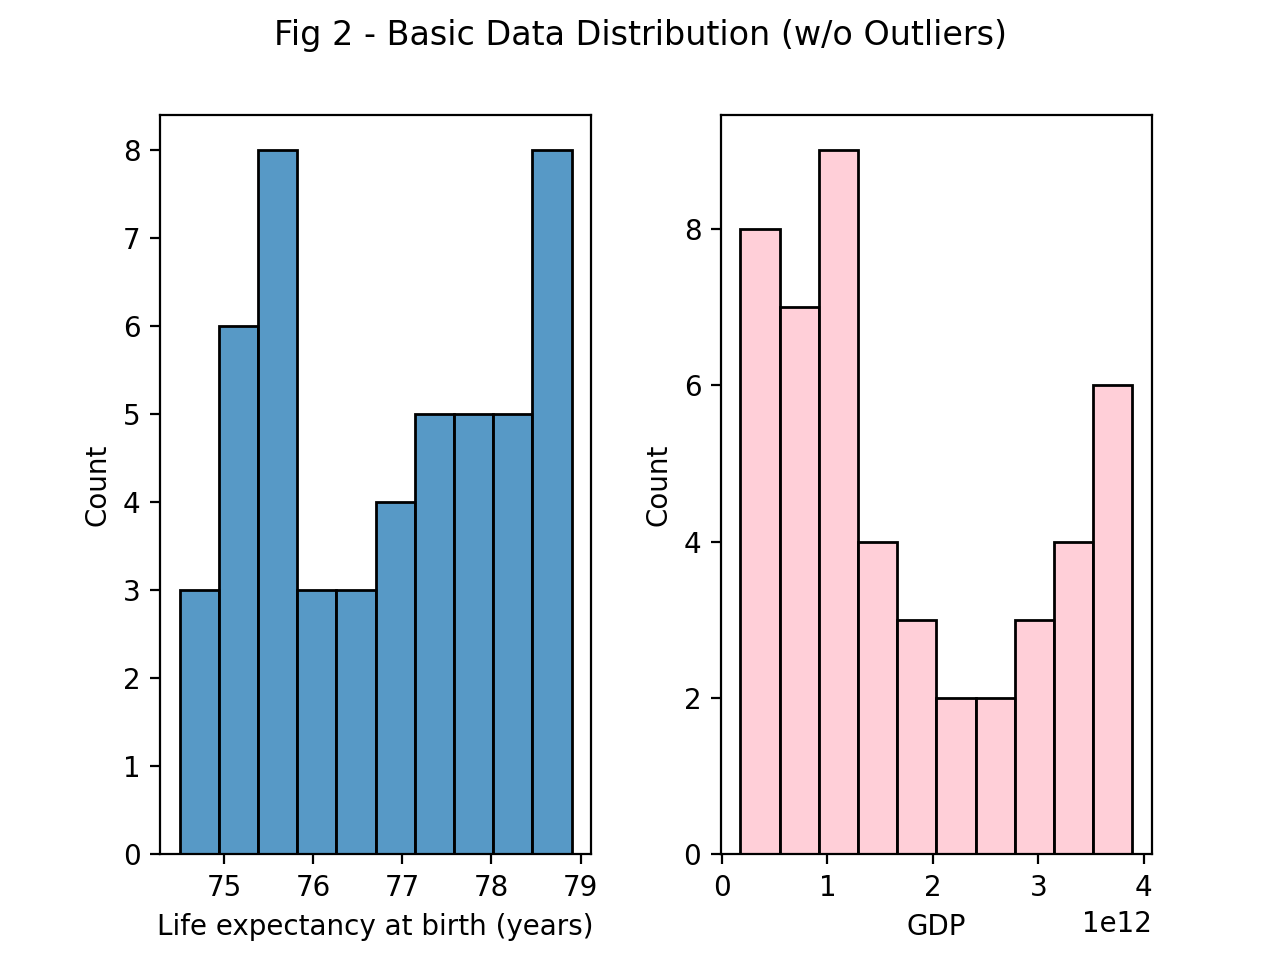

In [10]:
# Without Outliers
get_basic_dist(2, outliers=False)

### Single Variable Findings
**Fig 1 & 2**
- In general, life expectancy in relevant countries are found within 74 and 79 years
- In general, GDO in relevant countries are found within 1.73E11 and 4.07E12
- There are plenty of outliers in both measures

## Double Variable Visualisation

In [11]:
def double_variable_vis(fignum, accounting_for):
    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    plt.suptitle(f'Fig {fignum} - GDP and Life Expectancy per {accounting_for.title()}')
    sns.boxplot(ax=axes[0], data=df, y='GDP', x=accounting_for, palette='pastel')
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
    axes[0].set_yscale('log')
    sns.boxplot(ax=axes[1], data=df, y='Life expectancy at birth (years)', x=accounting_for, palette='pastel')
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
    plt.tight_layout()
    plt.show()

In [12]:
df.groupby(['Country'])[['GDP', 'Life expectancy at birth (years)']].describe()

GDP                                                          \
         count          mean           std           min           25%   
Country                                                                  
Chile     16.0  1.697888e+11  7.687884e+10  6.973681e+10  9.387303e+10   
China     16.0  4.957714e+12  3.501096e+12  1.211350e+12  1.881585e+12   
Germany   16.0  3.094776e+12  6.674862e+11  1.949950e+12  2.740870e+12   
Mexico    16.0  9.766506e+11  2.095716e+11  6.836480e+11  7.630910e+11   
USA       16.0  1.407500e+13  2.432694e+12  1.030000e+13  1.210000e+13   
Zimbabwe  16.0  9.062580e+09  4.298310e+09  4.415703e+09  5.748309e+09   

                                                    \
                   50%           75%           max   
Country                                              
Chile     1.729975e+11  2.449515e+11  2.783840e+11   
China     4.075195e+12  7.819550e+12  1.106470e+13   
Germany   3.396350e+12  3.596078e+12  3.890610e+12   
Mexico    1.004376e+12  1.156992e+12  1.298460e+12   
USA       1.445000e+13  1.567500e+13  1.810000e+13   
Zimbabwe  6.733671e+09  1.263446e+10  1.630467e+10   

         Life expectancy at birth (years)                                    \
                                    count      mean       std   min     25%   
Country                                                                       
Chile                                16.0  78.94375  1.058911  77.3  77.975   
China                                16.0  74.26250  1.318016  71.7  73.400   
Germany                              16.0  79.65625  0.975000  78.0  78.950   
Mexico                               16.0  75.71875  0.620987  74.8  75.225   
USA                                  16.0  78.06250  0.832566  76.8  77.425   
Zimbabwe                             16.0  50.09375  5.940311  44.3  45.175   

                               
            50%     75%   max  
Country                        
Chile     79.00  79.825  80.5  
China     74.45  75.250  76.1  
Germany   79.85  80.525  81.0  
Mexico    75.65  76.150  76.7  
USA       78.15  78.725  79.3  
Zimbabwe  47.40  55.325  60.7

<IPython.core.display.Javascript object>


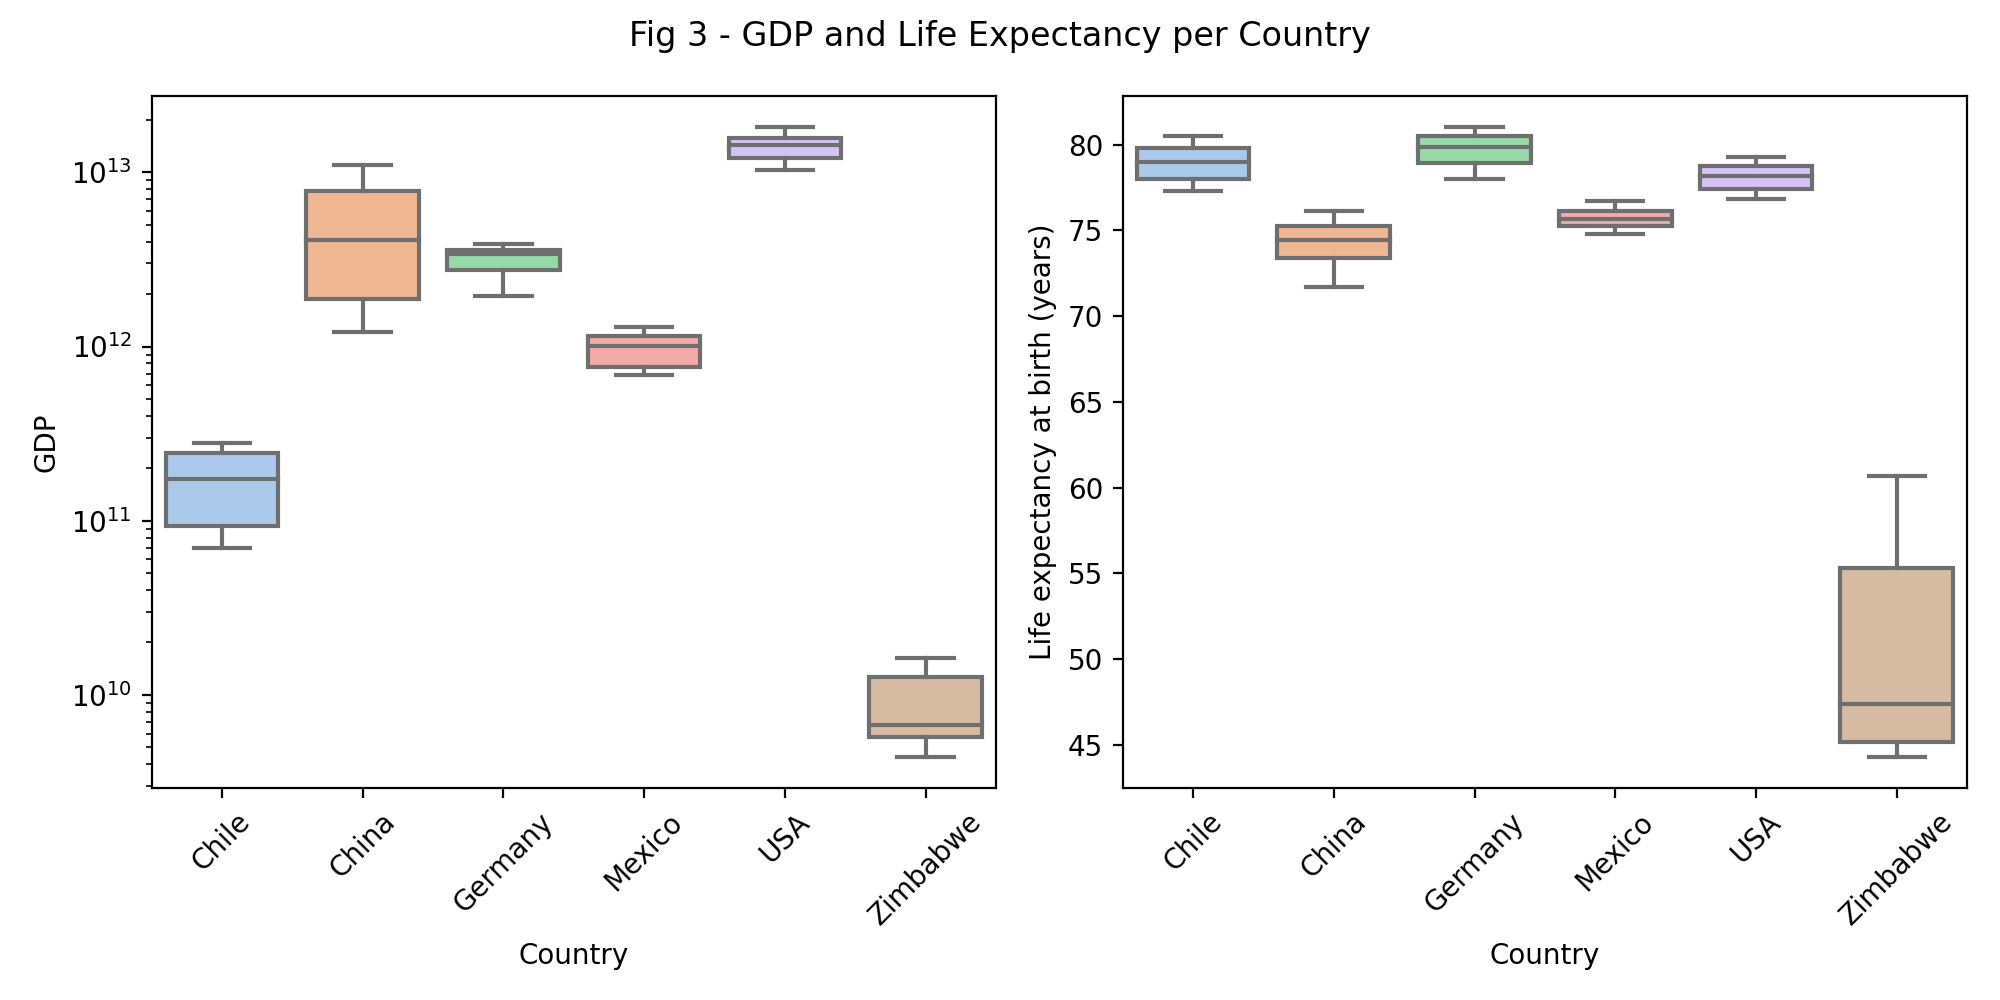

In [13]:
double_variable_vis(3, 'Country')

In [14]:
df.groupby(['Year'])[['GDP', 'Life expectancy at birth (years)']].describe()

GDP                                                          \
     count          mean           std           min           25%   
Year                                                                 
2000   6.0  2.371583e+12  3.951878e+12  6.689958e+09  2.293077e+11   
2001   6.0  2.448752e+12  4.062290e+12  6.777385e+09  2.344109e+11   
2002   6.0  2.561221e+12  4.211437e+12  6.342116e+09  2.376926e+11   
2003   6.0  2.743446e+12  4.396380e+12  5.727592e+09  2.350536e+11   
2004   6.0  2.991647e+12  4.689670e+12  5.805598e+09  2.669748e+11   
2005   6.0  3.207074e+12  4.981507e+12  5.755215e+09  3.088102e+11   
2006   6.0  3.463349e+12  5.268510e+12  5.443896e+09  3.574112e+11   
2007   6.0  3.785750e+12  5.474100e+12  5.291950e+09  3.910720e+11   
2008   6.0  4.055986e+12  5.547122e+12  4.415703e+09  4.100485e+11   
2009   6.0  4.000653e+12  5.476381e+12  8.621574e+09  3.530290e+11   
2010   6.0  4.299587e+12  5.729365e+12  1.014186e+10  4.266860e+11   
2011   6.0  4.710965e+12  5.999836e+12  1.209845e+10  4.819865e+11   
2012   6.0  4.962082e+12  6.356553e+12  1.424249e+10  4.969915e+11   
2013   6.0  5.269258e+12  6.638522e+12  1.545177e+10  5.242830e+11   
2014   6.0  5.558059e+12  6.988274e+12  1.589105e+10  5.203575e+11   
2015   6.0  5.658565e+12  7.358029e+12  1.630467e+10  4.699535e+11   

                                                \
               50%           75%           max   
Year                                             
2000  9.474990e+11  1.765300e+12  1.030000e+13   
2001  1.032052e+12  1.797838e+12  1.060000e+13   
2002  1.106055e+12  1.926992e+12  1.100000e+13   
2003  1.186787e+12  2.294370e+12  1.150000e+13   
2004  1.362809e+12  2.603275e+12  1.230000e+13   
2005  1.576158e+12  2.717550e+12  1.310000e+13   
2006  1.858706e+12  2.939870e+12  1.390000e+13   
2007  2.241710e+12  3.524122e+12  1.450000e+13   
2008  2.426825e+12  4.386750e+12  1.470000e+13   
2009  2.156480e+12  4.686965e+12  1.440000e+13   
2010  2.234110e+12  5.429738e+12  1.500000e+13   
2011  2.464445e+12  6.618838e+12  1.550000e+13   
2012  2.365290e+12  7.306408e+12  1.620000e+13   
2013  2.507245e+12  8.143542e+12  1.670000e+13   
2014  2.594535e+12  8.834452e+12  1.740000e+13   
2015  2.263935e+12  9.142428e+12  1.810000e+13   

     Life expectancy at birth (years)                                      \
                                count       mean        std   min     25%   
Year                                                                        
2000                              6.0  70.766667  12.344499  46.0  72.475   
2001                              6.0  70.833333  12.692938  45.3  72.900   
2002                              6.0  70.950000  12.979330  44.8  73.275   
2003                              6.0  71.033333  13.152592  44.5  73.575   
2004                              6.0  71.300000  13.377743  44.3  73.975   
2005                              6.0  71.483333  13.316969  44.6  74.250   
2006                              6.0  71.950000  13.159293  45.4  74.600   
2007                              6.0  72.300000  12.743940  46.6  74.800   
2008                              6.0  72.666667  12.178615  48.2  74.775   
2009                              6.0  73.066667  11.478792  50.0  75.100   
2010                              6.0  73.483333  10.524527  52.4  75.150   
2011                              6.0  74.200000   9.678843  54.9  75.425   
2012                              6.0  74.600000   9.047210  56.6  75.625   
2013                              6.0  74.966667   8.538072  58.0  75.850   
2014                              6.0  75.316667   8.147985  59.2  76.000   
2015                              6.0  75.716667   7.619033  60.7  76.250   

                           
        50%     75%   max  
Year                       
2000  75.80  77.175  78.0  
2001  75.95  77.200  78.3  
2002  76.00  77.600  78.4  
2003  76.10  77.725  78.5  
2004  76.45  77.875  79.1  
2005  76.40  78.175  79.2  
2006  76.

In [15]:
def timed_double_variable_vis(fignum, accounting_for):
    fig, axes = plt.subplots(2, 2, figsize=(9,9))
    plt.suptitle(f'Fig {fignum} - GDP and Life Expectancy per {accounting_for.title()}')
    sns.boxplot(ax=axes[0,0], data=df, y='GDP', x=accounting_for, palette='pastel')
    axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45)
    axes[0,0].set_yscale('log')
    sns.boxplot(ax=axes[0,1], data=df, y='Life expectancy at birth (years)', x=accounting_for, palette='pastel')
    axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45)
    sns.lineplot(ax=axes[1,0], data=df, y='GDP', x=accounting_for)
    axes[1,0].set_yscale('log')
    sns.lineplot(ax=axes[1,1], data=df, y='Life expectancy at birth (years)', x=accounting_for)
    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>


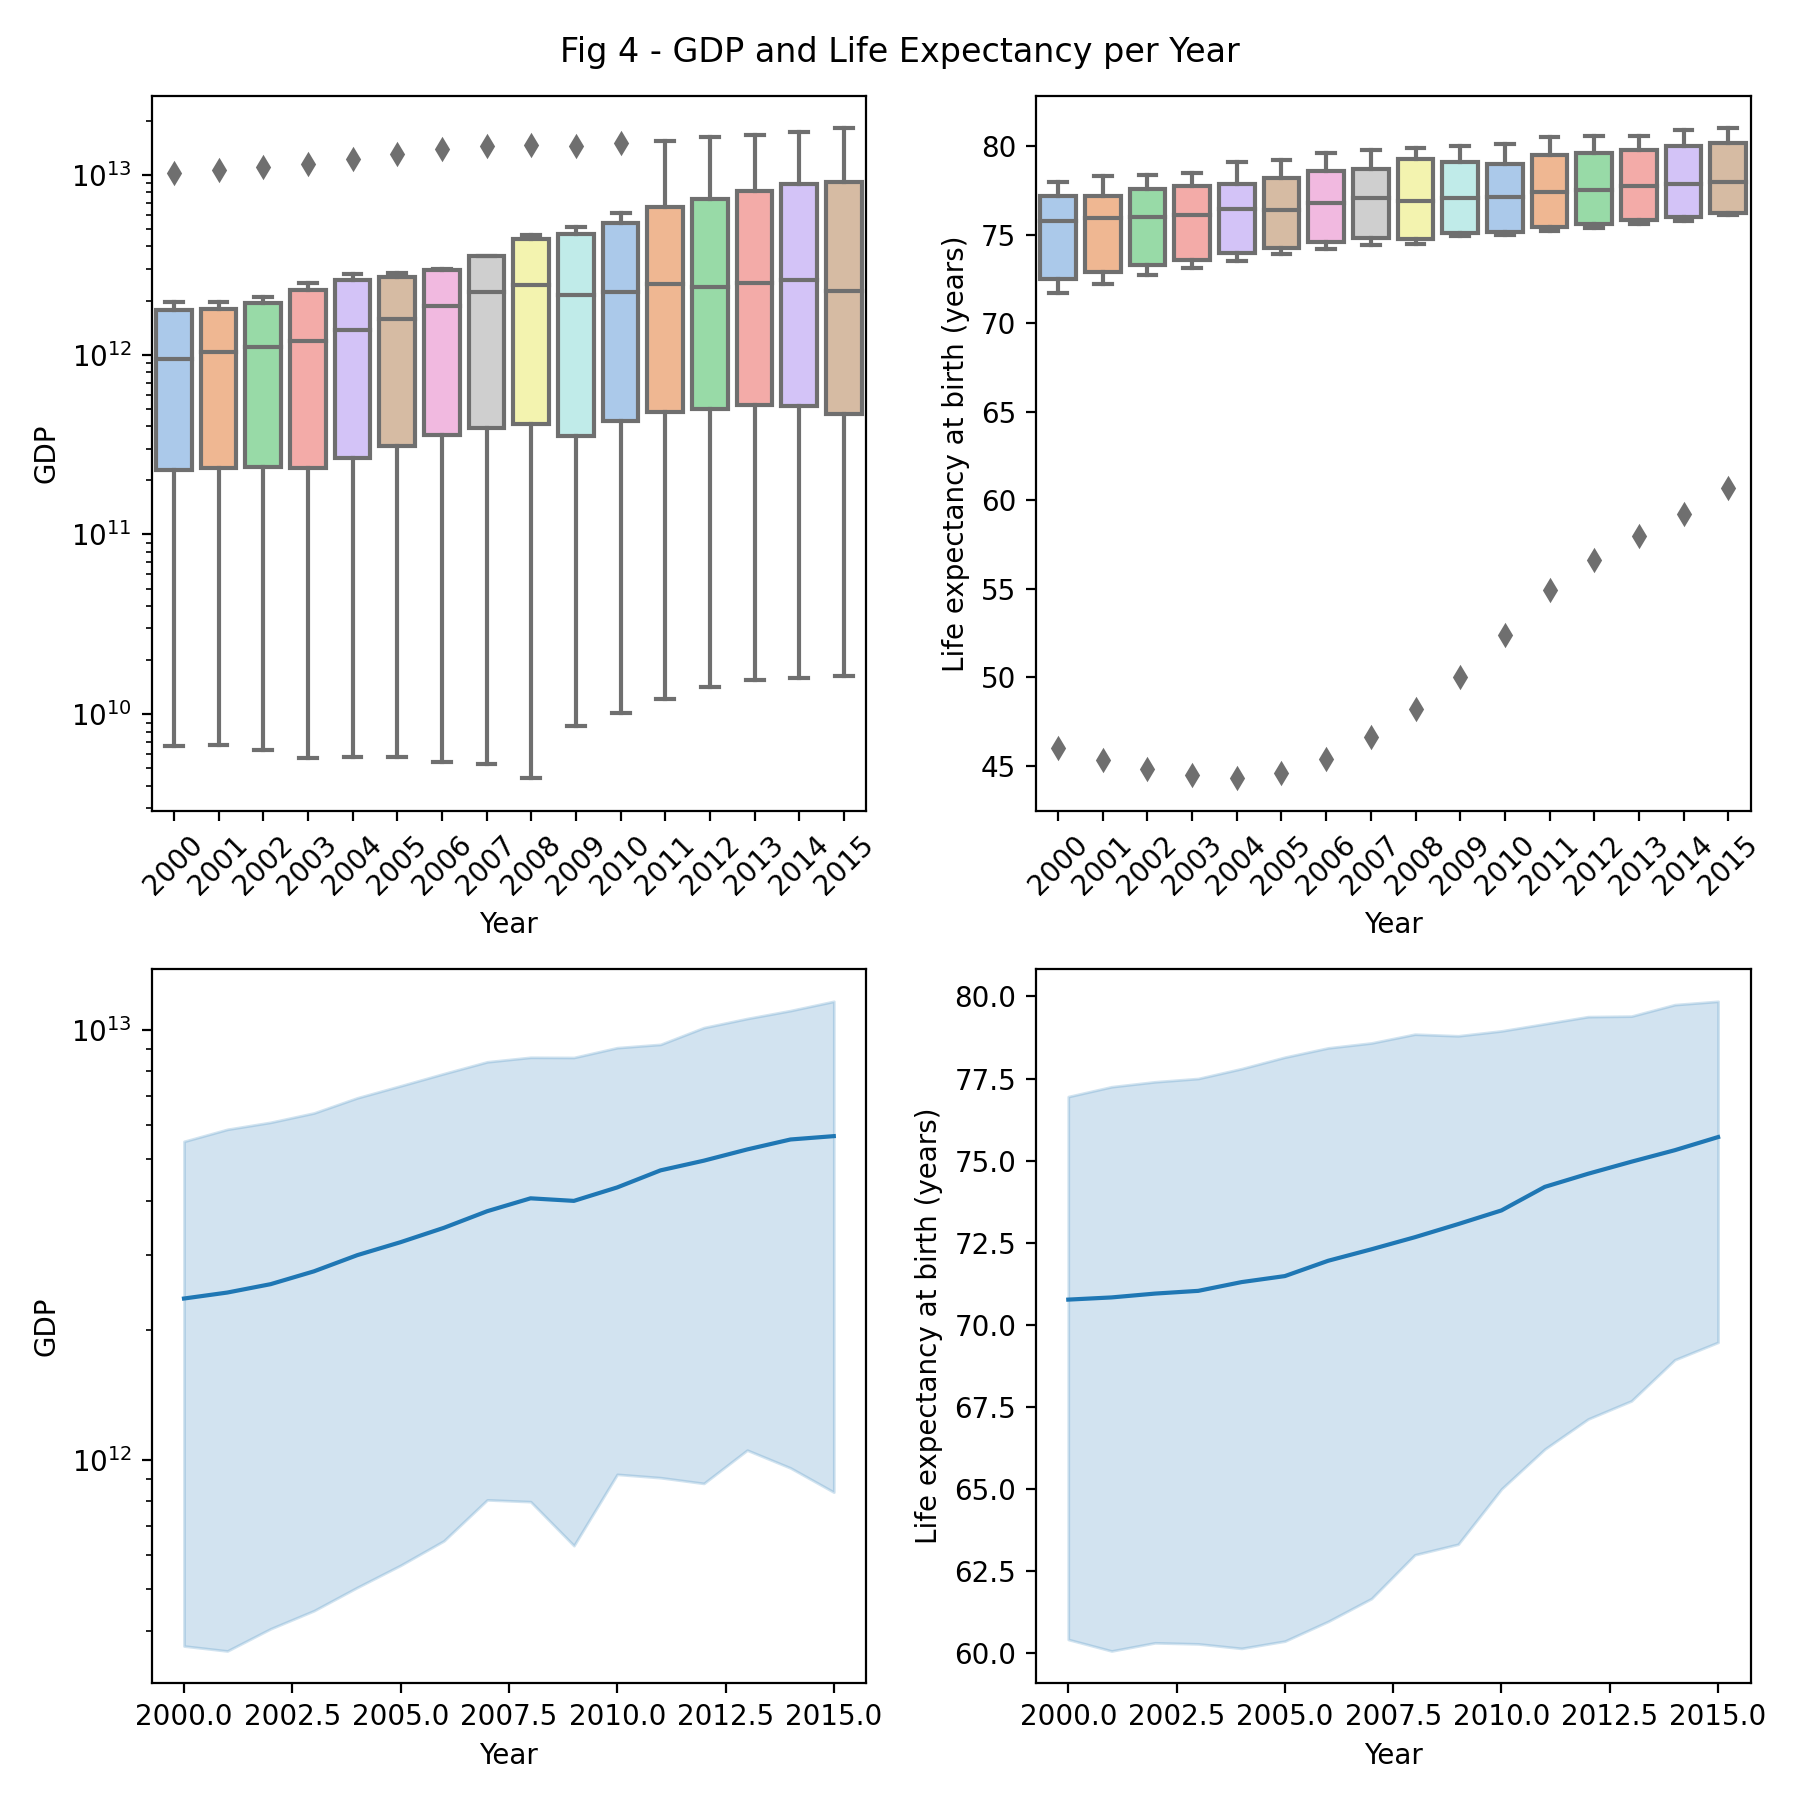

In [16]:
timed_double_variable_vis(4, 'Year')

### Double Variable Findings
**Fig 3**
- USA has a significantly higher *GDP* than other relevant countries
- Chile and Zimbabwe have significantly lower *GDP* than other relevant countries, Mexico is lower however significance may be questionable
- Zimbabwe has significantly lower *Life Expectancy* than other relevant countries
- USA does not appear to have proportionally significantly greater *Life Expectancy* such that is has higher *GDP*
- In a general sense, there is a similar pattern shown between the countries in *GDP* (log scale) and *Life Expectancy*

**Fig 4**
- In general, the lower quartile of *GDP* does not tend to lower over time, however the upper quartile of the IQR increases a fair amount over time
- In general, there is marginal increase in *Life Expectancy* over time in the interquartile range.
- The outliers in *Life Expectancy* increases dramatically following ~2006. This is likely the Zimbabwe data as shown from Figure 3

## Triple Variable Visualisation

In [17]:
def triple_variable_vis(fignum, x='GDP', y='Life expectancy at birth (years)'):
    plt.figure()
    plt.suptitle(f'Fig {fignum} - {x} vs {y.title()} Per Country')
    sns.scatterplot(data=df, x=x, y=y, hue='Country', palette='colorblind')
    plt.xscale('log')
    plt.show()

<IPython.core.display.Javascript object>


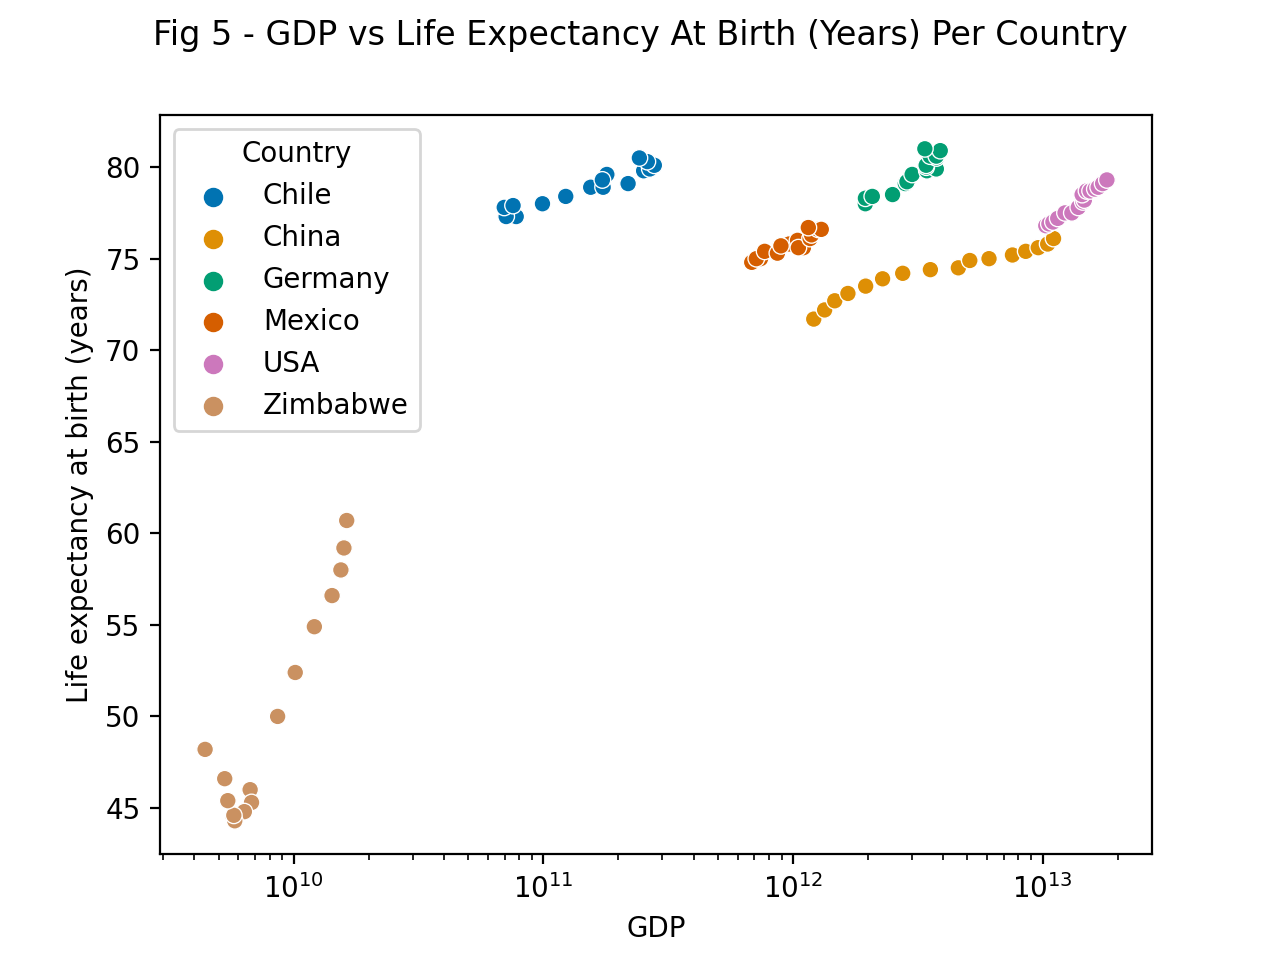

In [18]:
triple_variable_vis(5)

In [19]:
# Create col with ratio of GDP to Life Expectancy
df['GDP_LE_Ratio'] = df.GDP / df['Life expectancy at birth (years)']

In [20]:
def timed_triple_variable_vis(fignum, x, y, ylab, title):
    plt.figure()
    plt.suptitle(f'Fig {fignum} - {title}')
    sns.lineplot(data=df, x=x, y=y, hue='Country', palette='colorblind')
    plt.yscale('log')
    plt.legend(loc='lower right')
    plt.show()

<IPython.core.display.Javascript object>


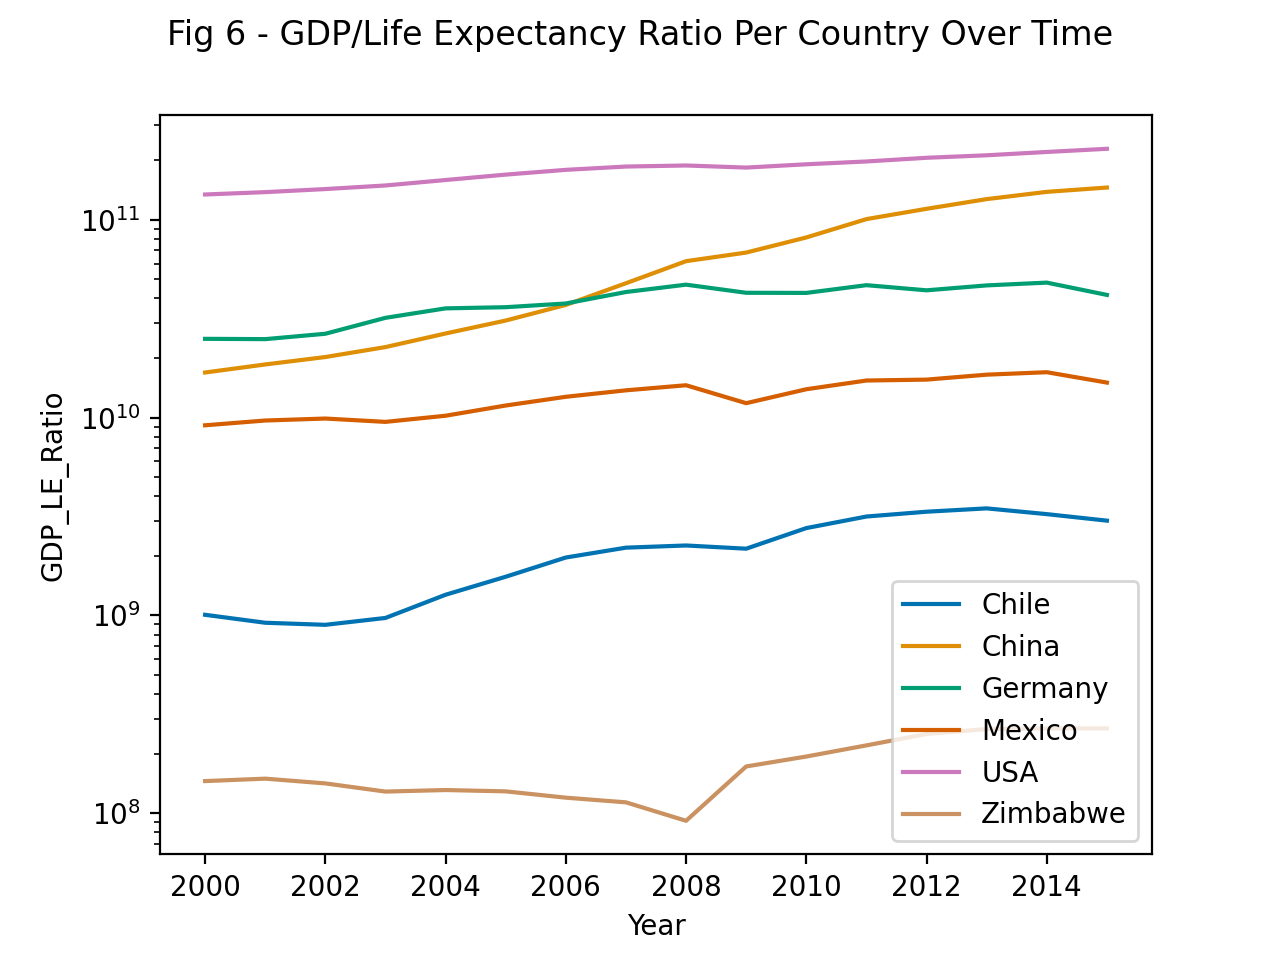

In [21]:
timed_triple_variable_vis(6, x='Year', y='GDP_LE_Ratio', ylab='GDP / Life Expectancy', title='GDP/Life Expectancy Ratio Per Country Over Time')

### Triple Variable Findings
**Fig 5**
- For most countries, there was a clear linear relationship between *GDP* and *Life Expectancy*.
- Zimbabwe has a far steeper incline than other countries, although with a significantly lower *GDP* and *Life Expectancy* than other countries at all datapoints

**Fig 6**
- Decline in the line indicates that *Life Expectancy* increases more than *GDP*, and vice versa
- The greater the increase in *GDP*, the lesser the incline for the *GDP/LE* ratio. This indicates that, while there is a seemingly linear relationship between *GDP* and *Life Expectancy*, there are apparent compounding returns to the effect that increasing GDP can have on *Life Expectancy*.

# Conclusions
The purpose of this project was to investigate the provided dataset, come up with relevant questions that can be answered using Python visualisation techniques, and to answer these questions accordingly. From the generated figures, the answers are seemily apparent. I would like to validate these answers using relevant statistical analysis techniques however this is not the purpose of this project.

**Does year or country have a greater effect on Life Expectancy?**
- The answer to this question can be seen in figures 3 & 4
- Figure 3 shows that, when separated by *Country*, *GDP* and *Life Expectancy* data is far more distinct than when separated by *Year* (Figure 4)
- This indicates that the variable of country has a far greater effect on the Life Expectancy
- It is interesting to note that, while this is the case, there were generic positive trends seen in both *GDP* and *Life Expectancy* when sepearated by *Year*


**Is there a relationship between GDP and Life Expectancy?**
- It is clear from Figure 5 that there is a positive association between *GDP* and *Life Expectancy*. Even if there was no hue separation between different countries, all data can clearly be seen to have a linear incline.
- Despite the fact that different countries have different levels of *GDP*, increases in *GDP* made throughout the years seemingly correlate with an increase in *Life Expectancy*.
- Figure 6 indicates the level by which *GDP* affects *Life Expectancy* over time. The ratio of *GDP:LE* tends to increase in all countries until ~2008, at which point it starts to level out. This means that, prior to 2008, there increases in *GDP* confer greater benefit to *Life Expectancy* than it does following 2008.

These findings are obviously to be taken with a grain of salt until statistical analysis can be performed. The greater benefit to this project has been the demonstration of data visualisations as a exploratory data analysis tool to find potential associations in the data, which can then be later dissected with great care.